In [1]:
import pandas as pd
import seaborn as sns
from keras.models import Sequential
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding, Flatten, Bidirectional
from keras.optimizers import Adam
from keras.models import Model
from keras.optimizers import RMSprop
from keras.callbacks import EarlyStopping
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.preprocessing.text import text_to_word_sequence
from keras.utils import np_utils
#sklearn imports
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


38237


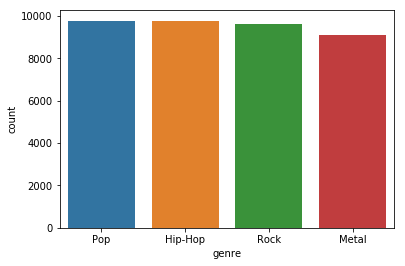

In [2]:
df = pd.read_pickle('10_word_seqs.pkl', compression='gzip')
print(len(df))
sns.countplot(df.genre)

# preprocess data
-  make our 10 word sequences integer encoded
- use one-hot encoding to encode our genres

creating our feature set w/Keras tokenizer class

In [3]:

#this value is the length of the longest song in our dataset.
MAX_VALUE = 10 #the length of each of our sequences
tok = Tokenizer(num_words=MAX_VALUE)
tok.fit_on_texts(df.lyrics)
#build sequences
sequences = tok.texts_to_sequences(df.lyrics)
sequences_matrix = sequence.pad_sequences(sequences, maxlen=MAX_VALUE)
sequences_matrix

array([[0, 0, 0, ..., 0, 3, 3],
       [0, 0, 0, ..., 4, 1, 7],
       [0, 0, 0, ..., 2, 4, 2],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 4, 1],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)

creating our target variables

In [4]:
label_encoder = LabelEncoder()
onehot_encoder = OneHotEncoder(sparse=False)

integer_encoded = label_encoder.fit_transform(df.genre)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)

[[0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 ...
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]]


/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


### split into test/train 80/20 split

In [5]:
X_train,X_test,Y_train,Y_test = train_test_split(sequences_matrix,onehot_encoded,test_size=0.2)

In [10]:
model = Sequential()
model.add(Dense(128, input_shape=X_train[0].shape, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(4, activation='softmax'))

In [11]:
from keras.optimizers import RMSprop
from keras.callbacks import TensorBoard
tensorboard = TensorBoard(log_dir='./logs/10_word_ffn', histogram_freq=0,
                          write_graph=True, write_images=False)
optimizer = RMSprop(lr=0.001)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [12]:
model.fit(X_train, Y_train, epochs=100, batch_size=128, validation_data=(X_test, Y_test), shuffle=True, callbacks=[tensorboard])

Train on 30589 samples, validate on 7648 samples
Epoch 1/100
30589/30589 [==============================] - 0s 13us/step - loss: 1.3877 - acc: 0.2779 - val_loss: 1.3837 - val_acc: 0.2867
Epoch 2/100
30589/30589 [==============================] - 0s 9us/step - loss: 1.3792 - acc: 0.2866 - val_loss: 1.3770 - val_acc: 0.2935
Epoch 3/100
30589/30589 [==============================] - 0s 9us/step - loss: 1.3762 - acc: 0.2927 - val_loss: 1.3730 - val_acc: 0.2977
Epoch 4/100
30589/30589 [==============================] - 0s 9us/step - loss: 1.3732 - acc: 0.2945 - val_loss: 1.3721 - val_acc: 0.2976
Epoch 5/100
30589/30589 [==============================] - 0s 9us/step - loss: 1.3709 - acc: 0.2969 - val_loss: 1.3708 - val_acc: 0.2998
Epoch 6/100
30589/30589 [==============================] - 0s 9us/step - loss: 1.3685 - acc: 0.3000 - val_loss: 1.3674 - val_acc: 0.3054
Epoch 7/100
30589/30589 [==============================] - 0s 9us/step - loss: 1.3668 - acc: 0.3022 - val_loss: 1.3666 - val_acc

Epoch 60/100
30589/30589 [==============================] - 0s 11us/step - loss: 1.3444 - acc: 0.3347 - val_loss: 1.3686 - val_acc: 0.3115
Epoch 61/100
30589/30589 [==============================] - 0s 9us/step - loss: 1.3442 - acc: 0.3322 - val_loss: 1.3702 - val_acc: 0.3150
Epoch 62/100
30589/30589 [==============================] - 0s 12us/step - loss: 1.3439 - acc: 0.3370 - val_loss: 1.3659 - val_acc: 0.3115
Epoch 63/100
30589/30589 [==============================] - 0s 12us/step - loss: 1.3436 - acc: 0.3366 - val_loss: 1.3639 - val_acc: 0.3108
Epoch 64/100
30589/30589 [==============================] - 0s 9us/step - loss: 1.3440 - acc: 0.3355 - val_loss: 1.3662 - val_acc: 0.3108
Epoch 65/100
30589/30589 [==============================] - 0s 9us/step - loss: 1.3437 - acc: 0.3350 - val_loss: 1.3645 - val_acc: 0.3155
Epoch 66/100
30589/30589 [==============================] - 0s 9us/step - loss: 1.3432 - acc: 0.3342 - val_loss: 1.3634 - val_acc: 0.3133
Epoch 67/100
30589/30589 [=====

In [ ]:
model.evaluate(x=X_test, y=Y_test, verbose=1)

In [14]:
model = Sequential()
model.add(Embedding(input_dim=1000, output_dim=50, input_length=10))
model.add(Flatten())
model.add(Dense(128, input_shape=X_train[0].shape, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(4, activation='softmax'))

In [15]:
optimizer = RMSprop(lr=0.001)
tensorboard = TensorBoard(log_dir='./logs/10_word_ffn_embed', histogram_freq=0,
                          write_graph=True, write_images=True)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [16]:
model.fit(X_train, Y_train, epochs=100, batch_size=128, validation_data=(X_test, Y_test), shuffle=True, callbacks=[tensorboard])


Train on 30589 samples, validate on 7648 samples
Epoch 1/100
30589/30589 [==============================] - 1s 24us/step - loss: 1.3592 - acc: 0.3135 - val_loss: 1.3533 - val_acc: 0.3202
Epoch 2/100
30589/30589 [==============================] - 1s 18us/step - loss: 1.3489 - acc: 0.3299 - val_loss: 1.3504 - val_acc: 0.3332
Epoch 3/100
30589/30589 [==============================] - 1s 18us/step - loss: 1.3453 - acc: 0.3350 - val_loss: 1.3517 - val_acc: 0.3218
Epoch 4/100
30589/30589 [==============================] - 1s 17us/step - loss: 1.3424 - acc: 0.3404 - val_loss: 1.3493 - val_acc: 0.3269
Epoch 5/100
30589/30589 [==============================] - 1s 18us/step - loss: 1.3395 - acc: 0.3430 - val_loss: 1.3495 - val_acc: 0.3304
Epoch 6/100
30589/30589 [==============================] - 1s 18us/step - loss: 1.3373 - acc: 0.3455 - val_loss: 1.3484 - val_acc: 0.3305
Epoch 7/100
30589/30589 [==============================] - 1s 22us/step - loss: 1.3345 - acc: 0.3469 - val_loss: 1.3465 - v

30589/30589 [==============================] - 1s 17us/step - loss: 1.2414 - acc: 0.3985 - val_loss: 1.4692 - val_acc: 0.3219
Epoch 60/100
30589/30589 [==============================] - 1s 21us/step - loss: 1.2403 - acc: 0.3982 - val_loss: 1.4667 - val_acc: 0.3258
Epoch 61/100
30589/30589 [==============================] - 1s 17us/step - loss: 1.2398 - acc: 0.3982 - val_loss: 1.4720 - val_acc: 0.3271
Epoch 62/100
30589/30589 [==============================] - 1s 23us/step - loss: 1.2396 - acc: 0.4011 - val_loss: 1.4861 - val_acc: 0.3302
Epoch 63/100
30589/30589 [==============================] - 1s 17us/step - loss: 1.2385 - acc: 0.4002 - val_loss: 1.4759 - val_acc: 0.3222
Epoch 64/100
30589/30589 [==============================] - 1s 22us/step - loss: 1.2384 - acc: 0.4015 - val_loss: 1.4707 - val_acc: 0.3201
Epoch 65/100
30589/30589 [==============================] - 1s 23us/step - loss: 1.2371 - acc: 0.3990 - val_loss: 1.4665 - val_acc: 0.3279
Epoch 66/100
30589/30589 [==============

In [74]:
model.evaluate(x=X_test, y=Y_test, verbose=1)


7648/7648 [==============================] - 0s 34us/step


[1.3543388035506883, 0.33734309623430964]

In [77]:
df.iloc[0].lyrics


['oh', 'baby', 'how', 'you', 'doing', 'you', 'know', 'im', 'gonna', 'cut']